In [135]:
## import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## import libraries for machine learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [155]:
## Let's Load the dataset

wine_quality_white= pd.read_csv('winequality-white.csv')
wine_quality_white.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [148]:
## Check if the dataset structure and null values.
wine_quality_white.info()
wine_quality_white.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Here in this dataset we observer data has no null values and also no missing values. This dataset structure Dtype is Float64 and int64, here our target variable is 'quality'.

In [4]:
wine_quality_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [149]:
wine_quality_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

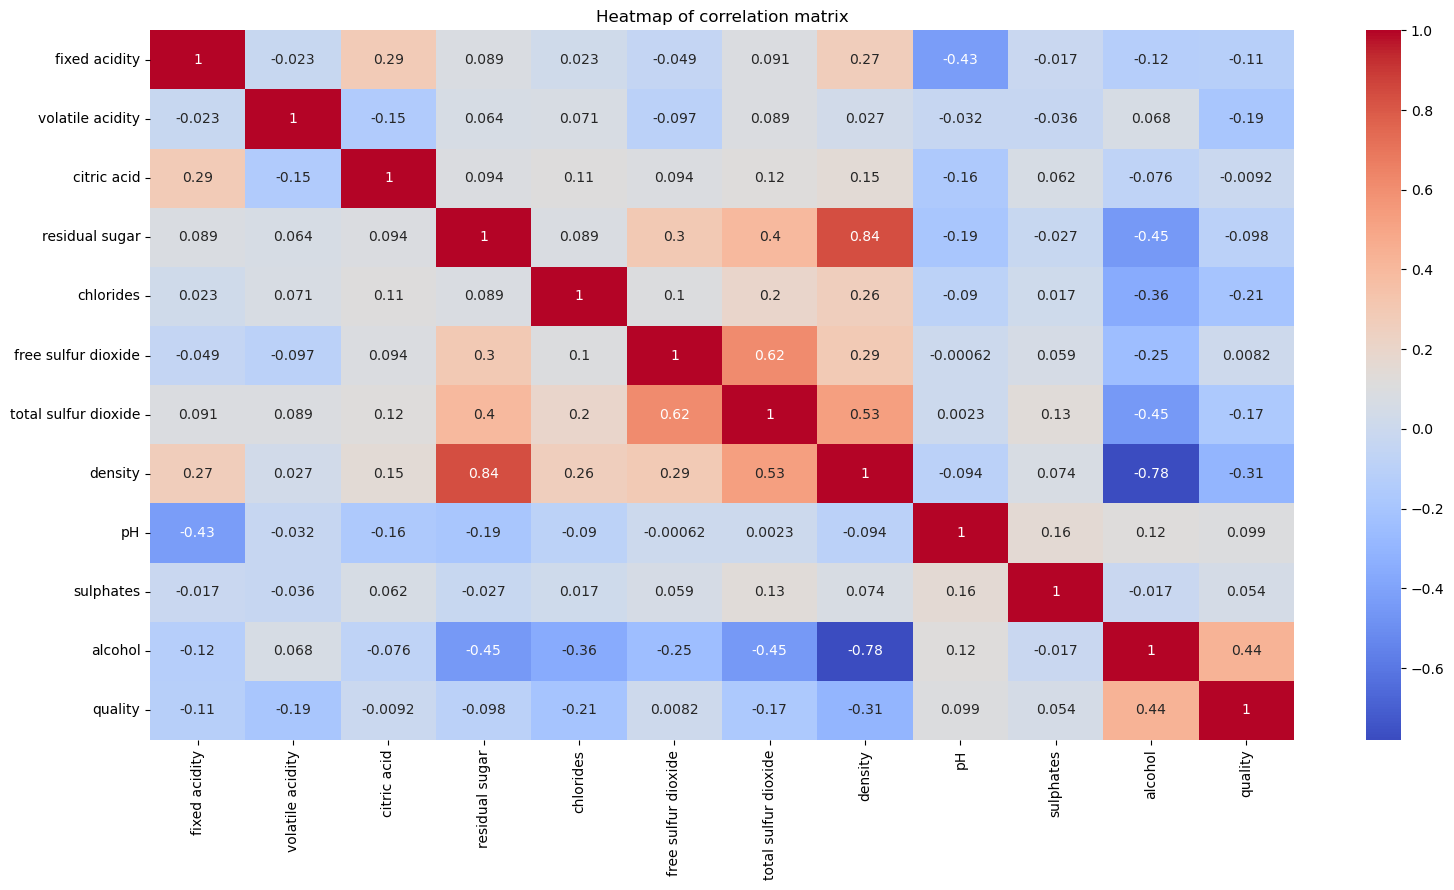

In [10]:
##  Lets check correlation of each other variable
wine_quality_white.corr()
fig, ax  = plt.subplots(figsize=(16,9))
sns.heatmap(wine_quality_white.corr(), annot=True, cmap='coolwarm', ax=ax)
plt.title('Heatmap of correlation matrix')
plt.tight_layout()
plt.show()

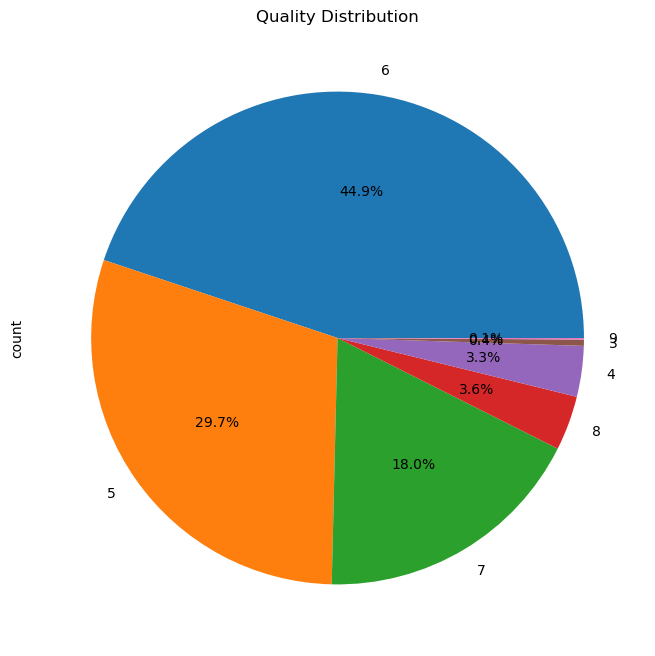

In [150]:
## Now let's create the pie chart of quality data

wine_quality_white['quality'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8,8))
plt.title('Quality Distribution')
plt.show()

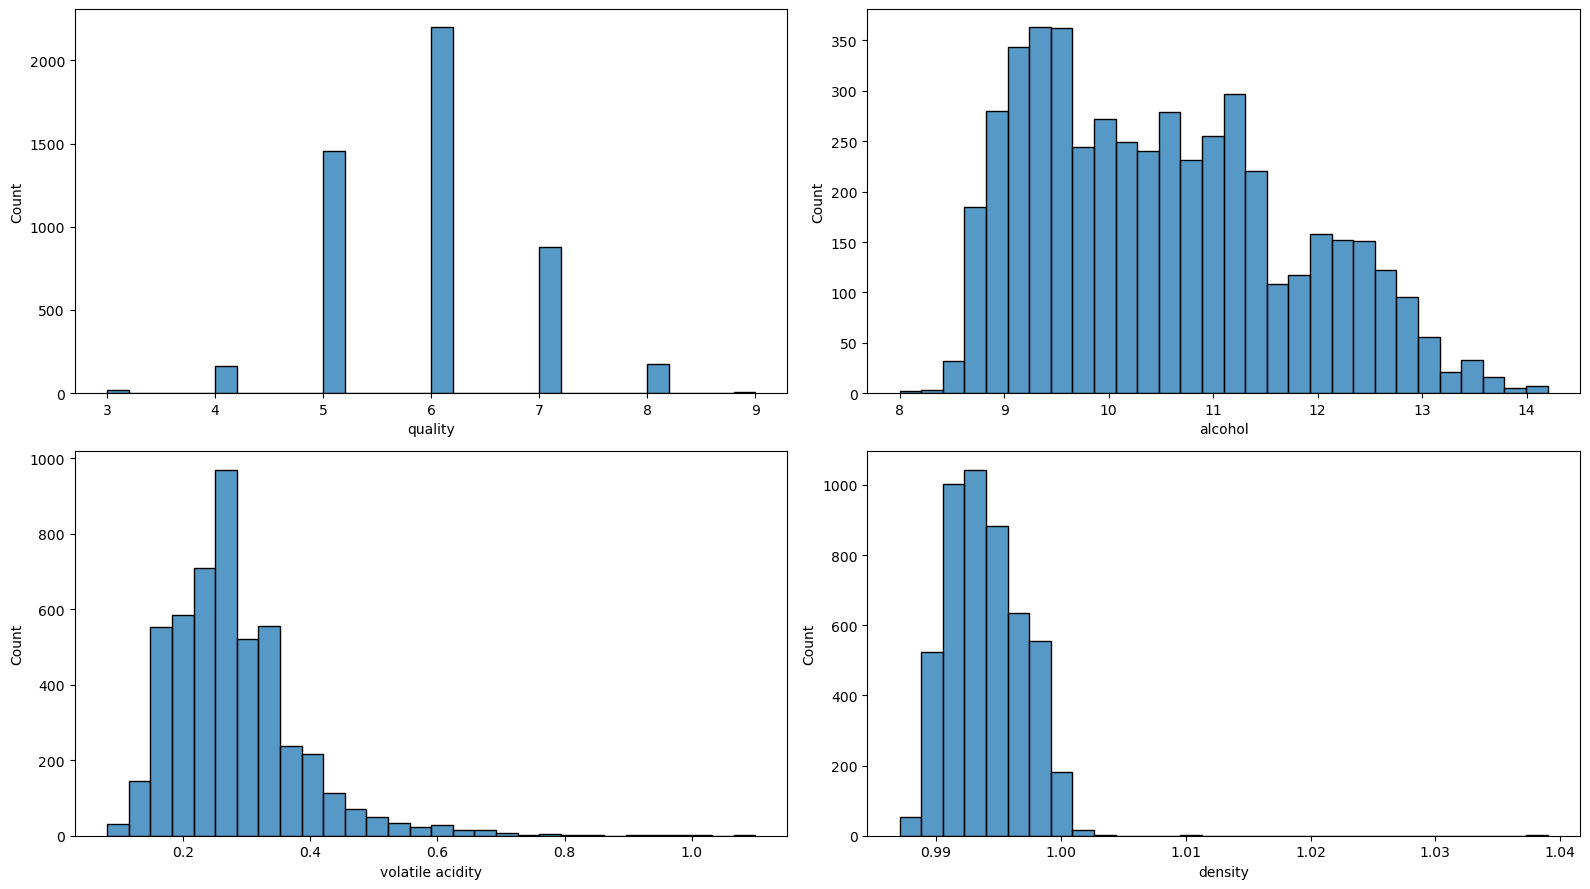

In [19]:
## Univariate plots of features
fig, ax  = plt.subplots(2,2, figsize=(16,9))
##  Univariate plots of features of quality 
sns.histplot(wine_quality_white['quality'], kde=False, ax=ax[0,0], bins=30)
## Univariate plots of features of alcohol 
sns.histplot(wine_quality_white['alcohol'], kde=False, ax=ax[0,1], bins=30)
## univariate plots of features of volatile acidity
sns.histplot(wine_quality_white['volatile acidity'], kde=False, ax=ax[1,0], bins=30)
## Univariate plots of features of density 
sns.histplot(wine_quality_white['density'], kde=False, ax=ax[1,1], bins=30)
plt.tight_layout()

plt.show()

<h4>## Univariate plots of quality is look normal distributed. Most of the wine quality lies between 5 and 7. Let's explore the relationship between quality and other features. where If quality is above 6 or above considering good wine and below 6 is considered low quality.<h4>
<h4>## Plot of alcohol and volatile acidity is left skewed. their is outliers are present in volatile acidity and density plot.<h4>

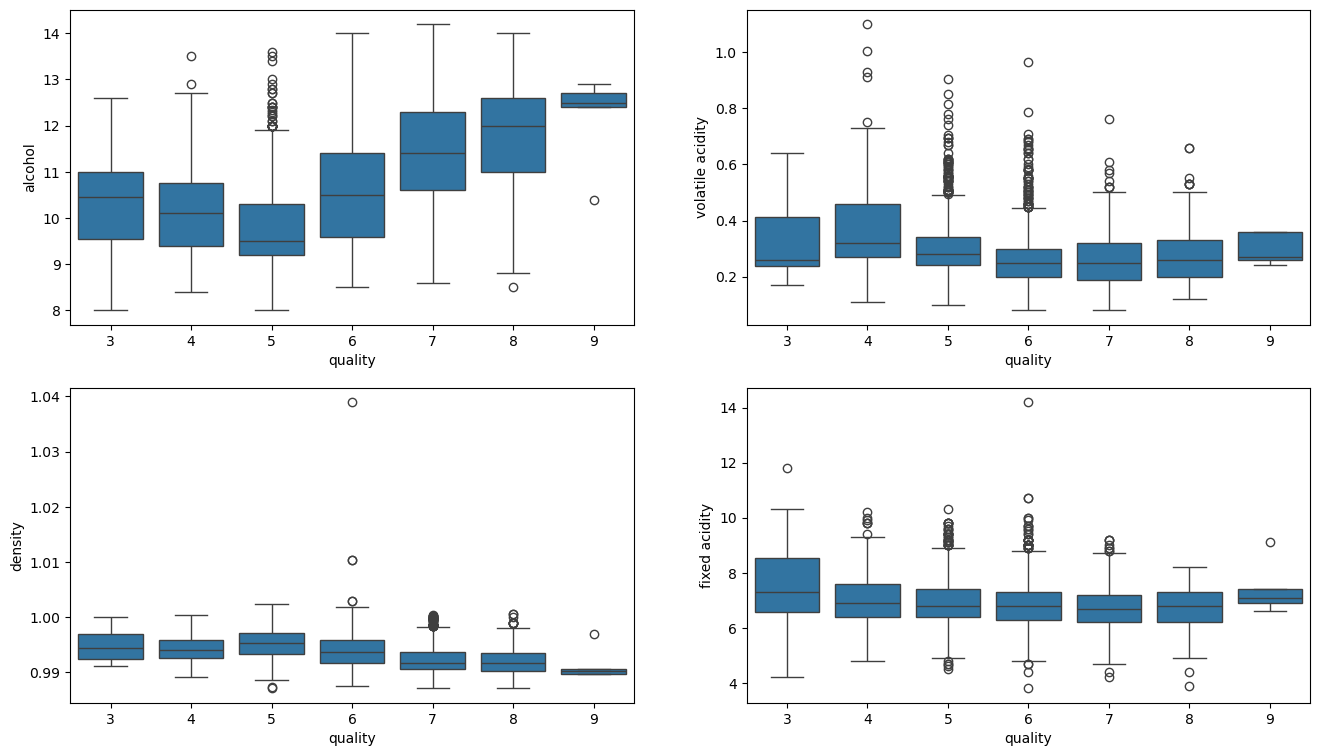

In [151]:
## Here we explore some bivariate plots to understand the relationship between features.

## Boxplot to see the distribution of features

fig, ax  = plt.subplots(2,2, figsize=(16,9))

sns.boxplot(x='quality', y='alcohol', data=wine_quality_white, ax=ax[0,0])

sns.boxplot(x='quality', y='volatile acidity', data=wine_quality_white, ax=ax[0,1])

sns.boxplot(x='quality', y='density', data=wine_quality_white, ax=ax[1,0])

sns.boxplot(x='quality', y='fixed acidity', data=wine_quality_white, ax=ax[1,1])


plt.show()

Boxplot of featuer with quality show some outliers in alcohol and volatile acidity and the boxpot plot of all data ditrbution it show outline in free sulfur dioxide, total sulfur dioxide So, we will remove these outliers from the all data ditrbution.


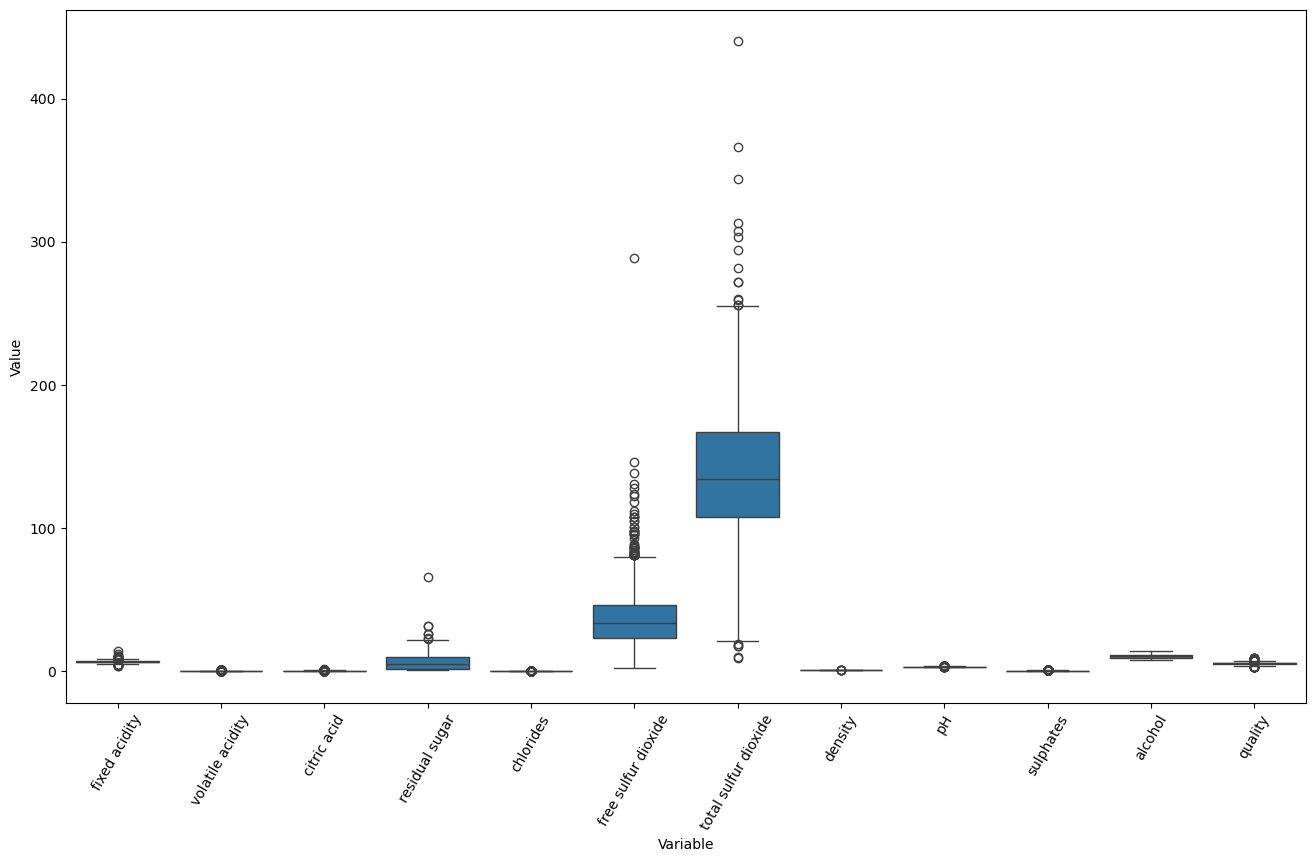

In [22]:
# Melt the DataFrame
melted_df = wine_quality_white.melt(var_name="Variable", value_name="Value")

# Plot the boxplot
plt.figure(figsize=(16, 9))
sns.boxplot(x="Variable", y="Value", data=melted_df, orient='v',)
plt.xticks(rotation=60)
plt.show()

In [133]:
## let's handle outliers 

def detect_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return [x for x in data if x < lower_bound or x > upper_bound]

# Now we considering outliers in alcohol, volatile acidity, density and fixed acidity because they are affecting the most to our quality feature.

## remove outliers from alcohol
outliers = detect_outliers(wine_quality_white['alcohol'])
data = wine_quality_white[~wine_quality_white['alcohol'].isin(outliers)]

## remove outliers from volatile acidity
outliers = detect_outliers(data['volatile acidity'])
data = data[~data['volatile acidity'].isin(outliers)]

## remove outliers from density
outliers = detect_outliers(data['density'])
data = data[~data['density'].isin(outliers)]

## remove outliers from fixed acidity
outliers = detect_outliers(data['fixed acidity'])
data = data[~data['fixed acidity'].isin(outliers)]

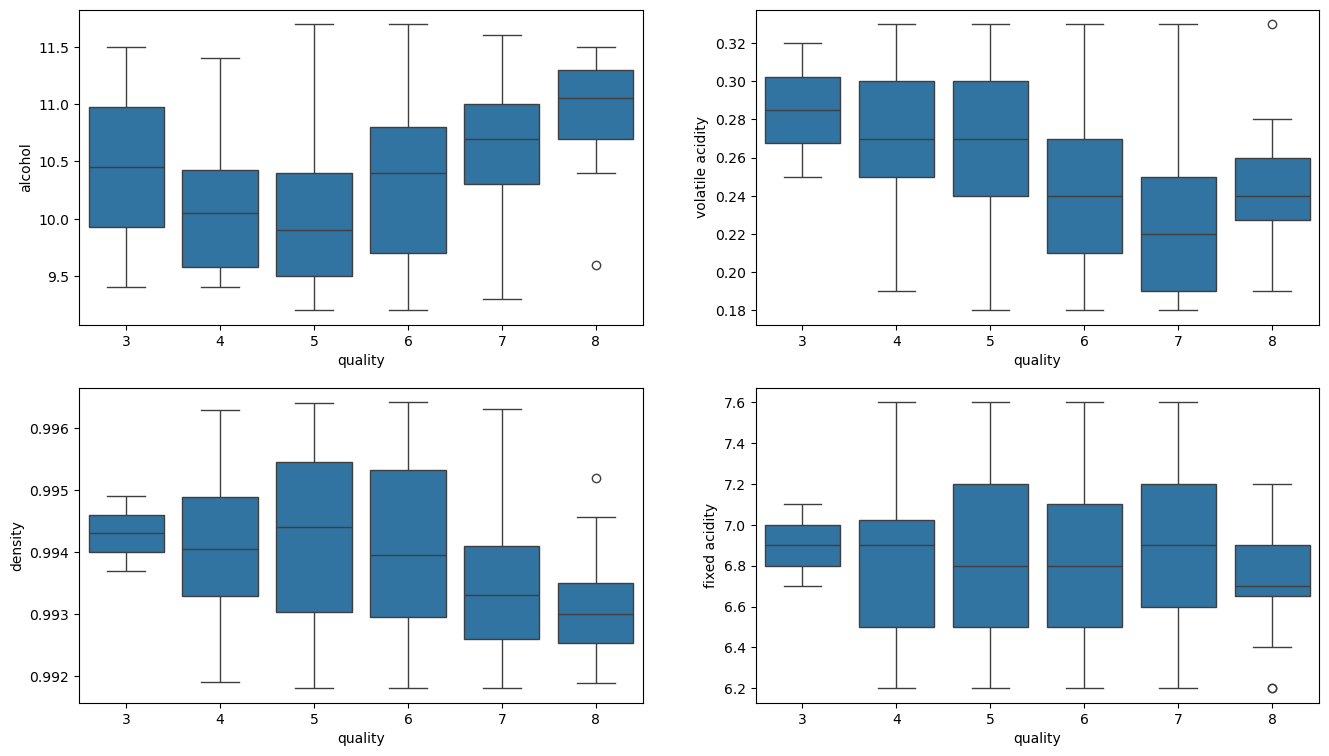

In [125]:
## Box plot to see the distribution of features after removing outliers
fig, ax  = plt.subplots(2,2, figsize=(16,9))

sns.boxplot(x='quality', y='alcohol', data=data, ax=ax[0,0])

sns.boxplot(x='quality', y='volatile acidity', data=data, ax=ax[0,1])

sns.boxplot(x='quality', y='density', data=data, ax=ax[1,0])

sns.boxplot(x='quality', y='fixed acidity', data=data, ax=ax[1,1])


plt.show()

In [178]:
df = data.copy()

df = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'density']]

In [179]:
## Now, let's prepare data for the machine learning algorithms

scaler = StandardScaler()

#data_scaled = scaler.fit_transform(wine_quality_white)

data_scaled = scaler.fit_transform(df)


In [180]:
##  Now, let's Reducing tha data dimensionality with PCA algorithm

pca = PCA(n_components=2)

principal_components = pca.fit_transform(data_scaled)



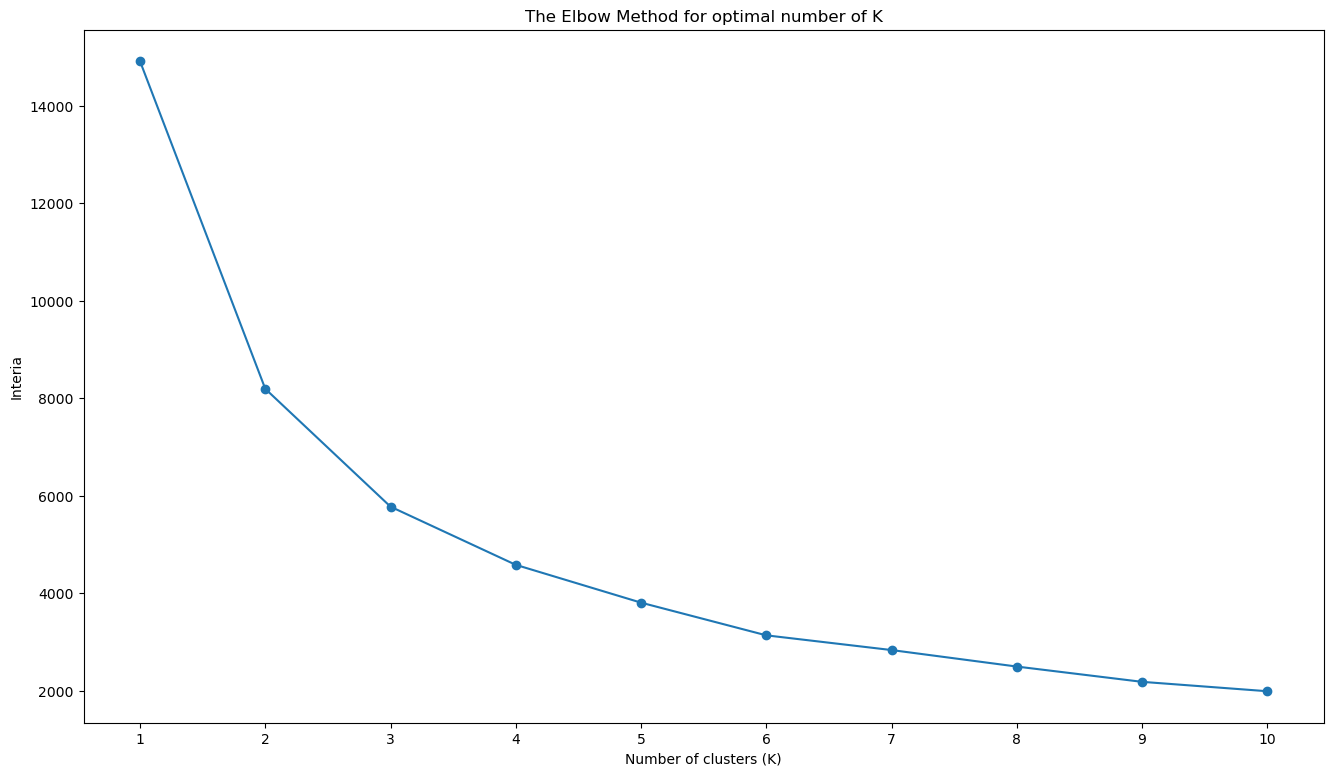

In [181]:
inertia = []

for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)    

plt.figure(figsize=(16,9))

plt.plot(range(1, 11), inertia, marker='o')

plt.title('The Elbow Method for optimal number of K')

plt.xlabel('Number of clusters (K)')

plt.ylabel('Interia')
plt.xticks(range(1, 11))
plt.show()


WCSS : 8189.283766643075
Iterations until converged : 9
Final Centroid :[[-0.97991849  0.1249222 ]
 [ 1.46642169 -0.18694272]]
Cluster Assignment : [1 0 1 ... 0 0 0]


<function matplotlib.pyplot.show(close=None, block=None)>

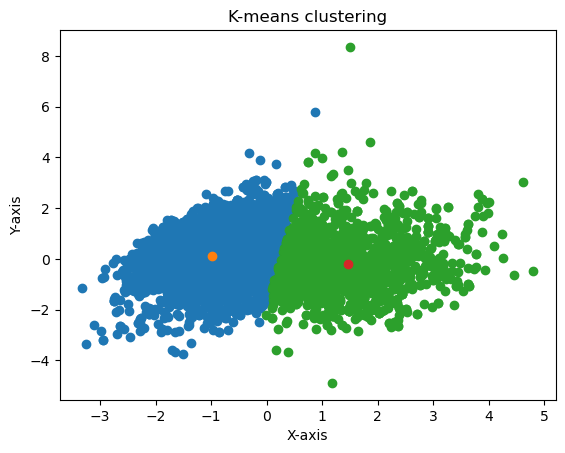

In [182]:
## Training of Model KMeans cluster 
kmeans = KMeans(n_clusters= 2, random_state= 200)

kmeans.fit(principal_components)

## Print result
print(f'WCSS : {kmeans.inertia_}')
print(f'Iterations until converged : {kmeans.n_iter_}')
print(f'Final Centroid :{kmeans.cluster_centers_}')
print(f'Cluster Assignment : {kmeans.labels_}')

## Visualising clustering

plt.figure()
for i in np.unique(kmeans.labels_):
    points =  principal_components[kmeans.labels_ == i]
    plt.scatter(points[:,0], points[:,1])
    plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i, 1])
plt.tight_layout
plt.title('K-means clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show


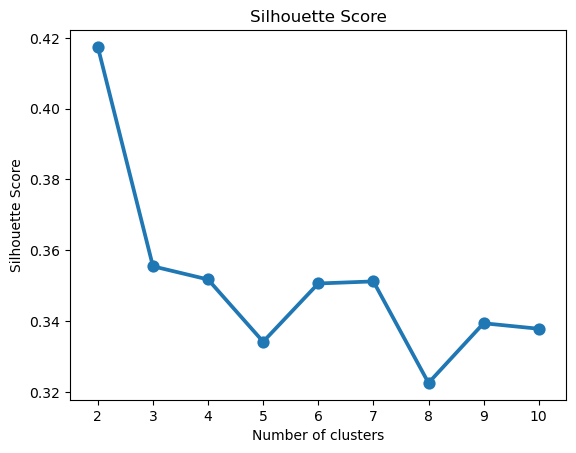

In [183]:
## Let's check Silhouette score for each cluster

## Dictionary to store silhouette score

silhouette_scores = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', init='k-means++', random_state=200, max_iter=1000)
    kmeans.fit(principal_components)
    score = silhouette_score(principal_components, kmeans.labels_)
    silhouette_scores[k] = score

# plot the scores

sns.pointplot(x=list(silhouette_scores.keys()), y=list(silhouette_scores.values()), markers= 'o')

plt.title('Silhouette Score')

plt.xlabel('Number of clusters')

plt.ylabel('Silhouette Score')

plt.show()

